In [1]:
import pandas as pd

In [2]:
latera_band = '../data/recorded/2022.08.12 11.09.csv'

df = pd.read_csv(latera_band)
df

,Frame,abs_NOSE_x,abs_NOSE_y,abs_NOSE_z,abs_NOSE_visibility,abs_NOSE_presence,abs_LEFT_EYE_INNER_x,abs_LEFT_EYE_INNER_y,abs_LEFT_EYE_INNER_z,abs_LEFT_EYE_INNER_visibility,...,rel_LEFT_FOOT_INDEX_x,rel_LEFT_FOOT_INDEX_y,rel_LEFT_FOOT_INDEX_z,rel_LEFT_FOOT_INDEX_visibility,rel_LEFT_FOOT_INDEX_presence,rel_RIGHT_FOOT_INDEX_x,rel_RIGHT_FOOT_INDEX_y,rel_RIGHT_FOOT_INDEX_z,rel_RIGHT_FOOT_INDEX_visibility,rel_RIGHT_FOOT_INDEX_presence
0,0,0.630652,0.385524,-0.431353,0.999889,0.0,0.638915,0.367284,-0.428182,0.999771,...,0.193795,0.721057,0.072471,0.914722,0.0,-0.217344,0.760777,-0.069435,0.960449,0.0
1,1,0.616710,0.397054,-0.357628,0.999887,0.0,0.627238,0.377292,-0.358150,0.999764,...,0.204607,0.714706,0.086047,0.911626,0.0,-0.160058,0.759907,0.098682,0.954975,0.0
2,2,0.603049,0.396834,-0.222835,0.999792,0.0,0.611737,0.376746,-0.228295,0.999430,...,0.226539,0.755338,0.124687,0.909650,0.0,-0.148216,0.789811,0.061799,0.953973,0.0
3,3,0.583547,0.379897,0.056831,0.998817,0.0,0.588335,0.364438,0.025610,0.998264,...,-0.012768,0.768956,0.083645,0.874920,0.0,0.126871,0.791796,0.130941,0.898945,0.0
4,4,0.573645,0.379518,-0.194165,0.998930,0.0,0.578898,0.363573,-0.190278,0.998428,...,0.135386,0.775482,0.112849,0.847610,0.0,-0.019509,0.809921,0.107691,0.883968,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,4868,0.875636,0.622502,-0.687032,0.988483,0.0,0.886974,0.598378,-0.675203,0.985303,...,0.020719,0.492540,0.481557,0.215239,0.0,-0.246075,0.361672,0.423852,0.224428,0.0
4869,4869,0.878528,0.617451,-0.727800,0.988632,0.0,0.889536,0.593201,-0.712342,0.985712,...,0.020721,0.495136,0.399959,0.208633,0.0,-0.258102,0.387353,0.397719,0.210042,0.0
4870,4870,0.876938,0.622059,-0.601893,0.987887,0.0,0.889517,0.598239,-0.587253,0.985025,...,0.019189,0.558618,0.373680,0.202612,0.0,-0.254460,0.413601,0.363153,0.198654,0.0
4871,4871,0.879550,0.623482,-0.641248,0.988371,0.0,0.891857,0.599875,-0.626795,0.985819,...,0.049455,0.584049,0.283244,0.206719,0.0,-0.258284,0.427600,0.355532,0.188730,0.0


In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy import signal
#import pywt

<AxesSubplot:>

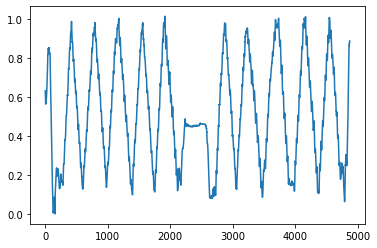

In [5]:
df.abs_NOSE_x.plot()

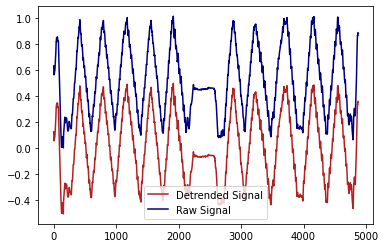

In [10]:
y_detrend = signal.detrend(df.abs_NOSE_x.values)
plt.plot(df.index, y_detrend,color='firebrick',label='Detrended Signal')
plt.plot(df.index, df.abs_NOSE_x.values, color='navy',label='Raw Signal')
plt.legend()

(0.0, 1000.0)

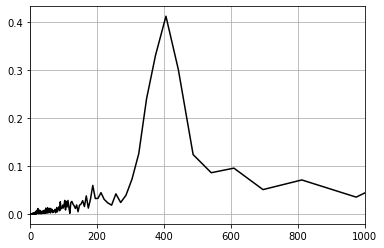

In [17]:
FFT =np.fft.fft(y_detrend)
new_N=int(len(FFT)/2) 
f_nat=1
new_X = np.linspace(10**-12, f_nat/2, new_N, endpoint=True)
new_Xph=1.0/(new_X)
FFT_abs=np.abs(FFT)
plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='black')
plt.grid(True)
plt.xlim(0,1000)

In [3]:
import math

def calc_distance(row, x_str, y_str, threshold = 0.5):
    #print(row)
    # if row[f'{x_str}_visibility'] < threshold:
    #     return None
    # if row[f'{y_str}_visibility'] < threshold:
    #     return None
    #print(row['LEFT_KNEE_x'], row['LEFT_KNEE_y'], row['LEFT_KNEE_z'], row['RIGHT_KNEE_x'], row['RIGHT_KNEE_y'], row['RIGHT_KNEE_z'])
    #print(row['RIGHT_KNEE_x'], row['RIGHT_KNEE_y'], row['RIGHT_KNEE_z'], row['RIGHT_KNEE_x'], row['RIGHT_KNEE_y'], row['RIGHT_KNEE_z'])
    
    x = (row[f'{x_str}_x'], row[f'{x_str}_y'], row[f'{x_str}_z'])
    y = (row[f'{y_str}_x'], row[f'{y_str}_y'], row[f'{y_str}_z'])
    #print(x)
    #print(y)
    
    return math.dist(x, y)

df.sample(10).apply(calc_distance, axis = 1, x_str = 'rel_LEFT_KNEE', y_str = 'rel_RIGHT_KNEE')

4157    0.383615
4405    0.624247
3333    0.573605
1347    0.435642
2201    0.306203
781     0.540216
2687    0.344214
2235    0.321856
2356    0.682650
1286    0.594135
dtype: float64

In [4]:
df['knees_distance'] = df.apply(calc_distance, axis = 1, x_str = 'rel_LEFT_KNEE', y_str = 'rel_RIGHT_KNEE')

In [68]:
from importlib import reload
from nsrtf import analysis
reload(analysis)

knees_distance_window = analysis.FloatingWindow(50)
knees_distance_window

In [ ]:
test_window = analysis.FloatingWindow(10)

for n in range(100):
    test_window.update(n)
    print(test_window.compare_splits(8))

In [51]:
knees_distance_window.data

[]

,Frame,abs_NOSE_x,abs_NOSE_y,abs_NOSE_z,abs_NOSE_visibility,abs_NOSE_presence,abs_LEFT_EYE_INNER_x,abs_LEFT_EYE_INNER_y,abs_LEFT_EYE_INNER_z,abs_LEFT_EYE_INNER_visibility,...,rel_LEFT_FOOT_INDEX_z,rel_LEFT_FOOT_INDEX_visibility,rel_LEFT_FOOT_INDEX_presence,rel_RIGHT_FOOT_INDEX_x,rel_RIGHT_FOOT_INDEX_y,rel_RIGHT_FOOT_INDEX_z,rel_RIGHT_FOOT_INDEX_visibility,rel_RIGHT_FOOT_INDEX_presence,knees_distance,switch
0,0,0.630652,0.385524,-0.431353,0.999889,0.0,0.638915,0.367284,-0.428182,0.999771,...,0.072471,0.914722,0.0,-0.217344,0.760777,-0.069435,0.960449,0.0,0.216107,True
1,1,0.616710,0.397054,-0.357628,0.999887,0.0,0.627238,0.377292,-0.358150,0.999764,...,0.086047,0.911626,0.0,-0.160058,0.759907,0.098682,0.954975,0.0,0.218542,True
2,2,0.603049,0.396834,-0.222835,0.999792,0.0,0.611737,0.376746,-0.228295,0.999430,...,0.124687,0.909650,0.0,-0.148216,0.789811,0.061799,0.953973,0.0,0.217827,True
3,3,0.583547,0.379897,0.056831,0.998817,0.0,0.588335,0.364438,0.025610,0.998264,...,0.083645,0.874920,0.0,0.126871,0.791796,0.130941,0.898945,0.0,0.124087,True
4,4,0.573645,0.379518,-0.194165,0.998930,0.0,0.578898,0.363573,-0.190278,0.998428,...,0.112849,0.847610,0.0,-0.019509,0.809921,0.107691,0.883968,0.0,0.056603,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,4868,0.875636,0.622502,-0.687032,0.988483,0.0,0.886974,0.598378,-0.675203,0.985303,...,0.481557,0.215239,0.0,-0.246075,0.361672,0.423852,0.224428,0.0,0.392364,True
4869,4869,0.878528,0.617451,-0.727800,0.988632,0.0,0.889536,0.593201,-0.712342,0.985712,...,0.399959,0.208633,0.0,-0.258102,0.387353,0.397719,0.210042,0.0,0.382906,True
4870,4870,0.876938,0.622059,-0.601893,0.987887,0.0,0.889517,0.598239,-0.587253,0.985025,...,0.373680,0.202612,0.0,-0.254460,0.413601,0.363153,0.198654,0.0,0.383341,True
4871,4871,0.879550,0.623482,-0.641248,0.988371,0.0,0.891857,0.599875,-0.626795,0.985819,...,0.283244,0.206719,0.0,-0.258284,0.427600,0.355532,0.188730,0.0,0.389073,True


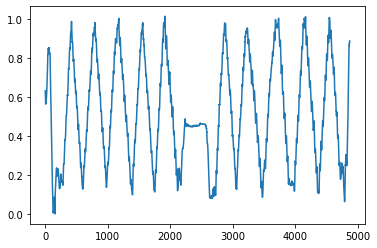

In [56]:
import statistics

def look_for_repetition(knees_distance):
    global knees_distance_window
    knees_distance_window.update(knees_distance)
    if len(knees_distance_window.data) < 50:
        return False
    
#     delta = statistics.mean(knees_distance_window.data[:-10]) -  statistics.mean(knees_distance_window.data[-10:])
    delta = statistics.mean(knees_distance_window.data[:-20]) -  statistics.mean(knees_distance_window.data[-20:])
    if delta > 0.15:
        return True
    else:
        return False
    

df['switch'] = df.abs_NOSE_x.apply(look_for_repetition)

df.abs_NOSE_x.plot()
df.query('switch == True')

In [39]:
smother_windows.size

3

<AxesSubplot:>

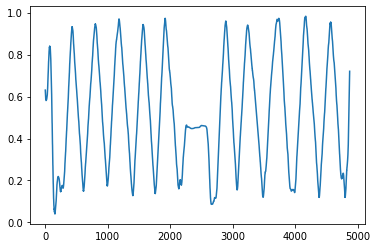

In [60]:
smother_windows = analysis.FloatingWindow(30)

def smoth(value):
    global smother_windows
    smother_windows.update(value)
    
    return statistics.mean(smother_windows.data)

df.abs_NOSE_x.apply(smoth).plot()

<AxesSubplot:>

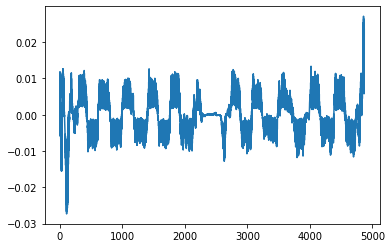

In [67]:
last_value = None

def delta(value):
    global last_value
    if last_value is None:
        last_value = value
        return None
    result = value - last_value
    last_value = value
    
    return result

df.abs_NOSE_x.apply(smoth).apply(delta).plot()

<AxesSubplot:>

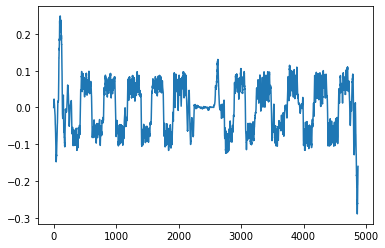

In [73]:
smother_windows = analysis.FloatingWindow(30)
df['abs_NOSE_x_s30'] = df.abs_NOSE_x.apply(smoth)

smother_windows = analysis.FloatingWindow(3)
df['abs_NOSE_x_s3'] = df.abs_NOSE_x.apply(smoth)

(df['abs_NOSE_x_s30'] - df['abs_NOSE_x_s3']).plot()

<AxesSubplot:>

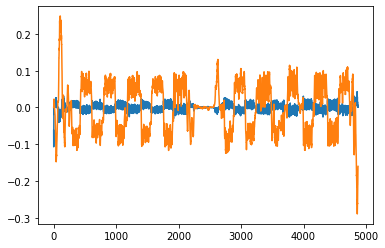

In [75]:
df.abs_NOSE_x.apply(smoth).apply(delta).plot()
(df['abs_NOSE_x_s30'] - df['abs_NOSE_x_s3']).plot()

<AxesSubplot:>

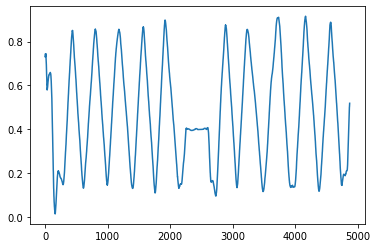

In [61]:
df.abs_RIGHT_KNEE_x.apply(smoth).plot()

,Frame,abs_NOSE_x,abs_NOSE_y,abs_NOSE_z,abs_NOSE_visibility,abs_NOSE_presence,abs_LEFT_EYE_INNER_x,abs_LEFT_EYE_INNER_y,abs_LEFT_EYE_INNER_z,abs_LEFT_EYE_INNER_visibility,...,rel_LEFT_FOOT_INDEX_z,rel_LEFT_FOOT_INDEX_visibility,rel_LEFT_FOOT_INDEX_presence,rel_RIGHT_FOOT_INDEX_x,rel_RIGHT_FOOT_INDEX_y,rel_RIGHT_FOOT_INDEX_z,rel_RIGHT_FOOT_INDEX_visibility,rel_RIGHT_FOOT_INDEX_presence,knees_distance,switch
49,49,0.845246,0.689114,-0.366213,0.997619,0.0,0.855273,0.671862,-0.361558,0.997460,...,0.698504,0.220345,0.0,0.029796,0.467539,0.565203,0.363642,0.0,0.143750,True
50,50,0.846594,0.689167,-0.376777,0.997744,0.0,0.855244,0.671660,-0.371335,0.997621,...,0.697820,0.200284,0.0,0.029358,0.469539,0.563926,0.341696,0.0,0.152220,True
51,51,0.845967,0.689177,-0.324512,0.997714,0.0,0.854046,0.671683,-0.320747,0.997651,...,0.710123,0.181937,0.0,0.061226,0.463657,0.558136,0.322091,0.0,0.160137,True
52,52,0.848174,0.690214,-0.370268,0.997683,0.0,0.856300,0.672361,-0.365675,0.997672,...,0.705444,0.165881,0.0,0.048754,0.466354,0.554413,0.304039,0.0,0.159605,True
53,53,0.849150,0.690421,-0.373006,0.997674,0.0,0.858441,0.670898,-0.369229,0.997720,...,0.708804,0.151998,0.0,0.016930,0.467786,0.555188,0.293027,0.0,0.161314,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,4868,0.875636,0.622502,-0.687032,0.988483,0.0,0.886974,0.598378,-0.675203,0.985303,...,0.481557,0.215239,0.0,-0.246075,0.361672,0.423852,0.224428,0.0,0.392364,True
4869,4869,0.878528,0.617451,-0.727800,0.988632,0.0,0.889536,0.593201,-0.712342,0.985712,...,0.399959,0.208633,0.0,-0.258102,0.387353,0.397719,0.210042,0.0,0.382906,True
4870,4870,0.876938,0.622059,-0.601893,0.987887,0.0,0.889517,0.598239,-0.587253,0.985025,...,0.373680,0.202612,0.0,-0.254460,0.413601,0.363153,0.198654,0.0,0.383341,True
4871,4871,0.879550,0.623482,-0.641248,0.988371,0.0,0.891857,0.599875,-0.626795,0.985819,...,0.283244,0.206719,0.0,-0.258284,0.427600,0.355532,0.188730,0.0,0.389073,True


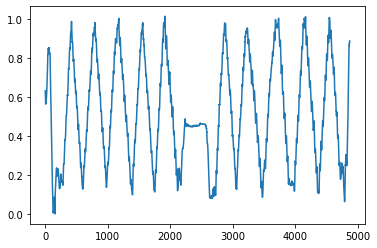

In [53]:
df.abs_NOSE_x.plot()
df.query('switch == True')

<AxesSubplot:>

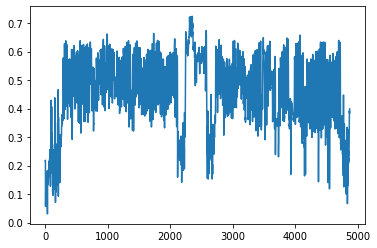

In [12]:
df.knees_distance.plot()

<AxesSubplot:>

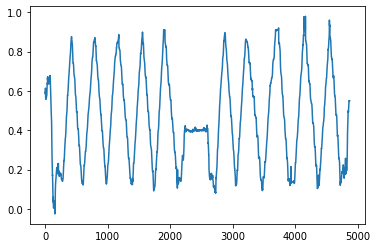

In [14]:
df.abs_RIGHT_KNEE_x.plot()

<AxesSubplot:>

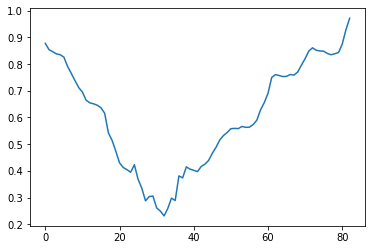

In [9]:
df.abs_RIGHT_KNEE_x.plot()

In [4]:
floating_window = []
def update_floating_window(new_row, size = 15 * 30):
    global floating_window
    if len(floating_window) > size:
        floating_window[:size-1]
    floating_window.insert(0, new_row)
    


AttributeError: 'DataFrame' object has no attribute 'LEFT_KNEE_x'